 ## NOTEBOOK IMPORTS

In [149]:
import os
import itertools

import numpy as np
from numpy.random import seed
seed(888)

import tensorflow as tf
from tensorflow.random import set_seed
set_seed(404)

In [2]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

#from Ipython.display import display
from sklearn.metrics import confusion_matrix

from time import strftime
import matplotlib.pyplot as plt

# CONSTANTS

In [131]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMG_WIDTH = 32
IMG_HEIGHT = 32
COLOR_CHANNELS = 3
IMG_PIXELS = IMG_WIDTH * IMG_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMG_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

## GET THE DATA

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)

module

In [6]:
type(x_train_all)

numpy.ndarray

## EXPLORE DATA

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

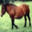

In [8]:
pic = array_to_img(x_train_all[7])
pic

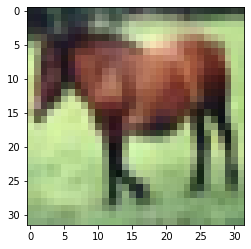

In [9]:
plt.imshow(x_train_all[7])

plt.show()

In [10]:
y_train_all[400][0]

2

In [11]:
LABEL_NAMES[y_train_all[400][0]]

'Bird'

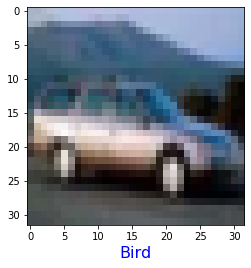

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[400][0]], fontsize=16, color='blue')
plt.show()

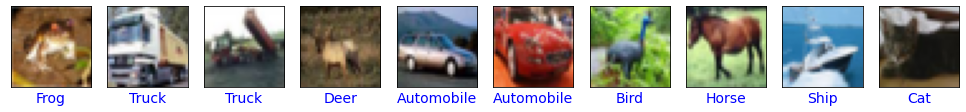

In [13]:
plt.figure(figsize=[17, 17])

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_all[i])
    
    plt.xticks([])
    plt.yticks([])
    
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14, color='blue')

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
nr_images, x, y, c = x_train_all.shape

In [17]:
print(f"Number of Images: {nr_images} \t|   width: {x} \t|   height:{y} \t|   Channels: {c}")

Number of Images: 50000 	|   width: 32 	|   height:32 	|   Channels: 3


In [18]:
x_test.shape

(10000, 32, 32, 3)

## PRE-PROCESS DATA

In [19]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [20]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [21]:
x_train_all[0][0][0][0]

0.23137254901960785

In [22]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [23]:
x_train_all.shape

(50000, 3072)

In [24]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)

In [25]:
x_test.shape

(10000, 3072)

## CREATE VALIDATION DATASET

In [26]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

## CHALLENGE:

In [27]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [28]:
x_train.shape

(40000, 3072)

## CREATE A SMALL DATASET (For illustration)

In [29]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [30]:
x_train_xs.shape

(1000, 3072)

## DEFINE THE NEURAL NETWORK USING KERAS

In [31]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden_1'),
    Dense(units=64, activation='relu', name='m1_hidden_2'),
    Dense(16, activation='relu', name='m1_hidden_3'),
    Dense(10, activation='softmax', name='m1_output')
    
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model_2 = Sequential()
model_2.add(Dropout(.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_2.add(Dense(units=128, activation='relu', name='m2_hidden_1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden_2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden_3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model_3 = Sequential()
model_3.add(Dropout(.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_3.add(Dense(units=128, activation='relu', name='m3_hidden_1'))
model_3.add(Dropout(.25, seed=42))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden_2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden_3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [35]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden_1 (Dense)          (None, 128)               393344    
_________________________________________________________________
m1_hidden_2 (Dense)          (None, 64)                8256      
_________________________________________________________________
m1_hidden_3 (Dense)          (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [36]:
32*32*3*128 + 128 + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

## TENSORBOARD - Visualizing Learning

In [37]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%I %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)

    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully Created Directory')
    
    return TensorBoard(log_dir=dir_paths)

In [38]:
samples_per_batch = 1000

In [39]:
# %%time

# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, 
#             batch_size=samples_per_batch, epochs=nr_epochs, 
#             verbose=0,
#             validation_data=(x_val, y_val),
#             callbacks=[get_tensorboard('Model 1')])

In [40]:
# %%time

# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, 
#             batch_size=samples_per_batch, epochs=nr_epochs, 
#             verbose=0,
#             validation_data=(x_val, y_val),
#             callbacks=[get_tensorboard('Model 2')])

In [41]:
%%time

nr_epochs = 100
model_1.fit(x_train, y_train, 
            batch_size=samples_per_batch, epochs=nr_epochs, 
            verbose=0,
            validation_data=(x_val, y_val),
            callbacks=[get_tensorboard('Model 1 XL')])

Successfully Created Directory
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 8min 24s


In [42]:
%%time

nr_epochs = 100
model_2.fit(x_train, y_train, 
            batch_size=samples_per_batch, epochs=nr_epochs, 
            verbose=0,
            validation_data=(x_val, y_val),
            callbacks=[get_tensorboard('Model 2 XL')])

Successfully Created Directory
Wall time: 18min 49s


In [43]:
%%time

nr_epochs = 100
model_3.fit(x_train, y_train, 
            batch_size=samples_per_batch, epochs=nr_epochs, 
            verbose=0,
            validation_data=(x_val, y_val),
            callbacks=[get_tensorboard('Model 3 XL')])

Successfully Created Directory
Wall time: 22min 53s
Parser   : 285 ms


## PREDICTIONS ON INDIVIDUAL IMAGES

In [44]:
x_val[1].shape

(3072,)

In [45]:
test = np.expand_dims(x_val[1], axis=0)
test.shape

(1, 3072)

In [46]:
np.set_printoptions(precision=3)

In [47]:
model_2.predict(test)[0]

array([6.783e-03, 6.953e-01, 1.668e-03, 1.260e-02, 1.367e-03, 1.704e-02,
       3.565e-04, 4.528e-03, 3.840e-02, 2.220e-01], dtype=float32)

In [48]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

In [49]:
y_val[1]

array([9], dtype=uint8)

In [50]:
for x in range(10):
    value = np.expand_dims(x_val[x], axis=0)
    predicted_value = model_2.predict_classes(value)
    actual_value = y_val[x]
    
    print(f"Image{x}: Actual value={actual_value[0]}  Vs  Predicted Value={predicted_value[0]}")

Image0: Actual value=6  Vs  Predicted Value=6
Image1: Actual value=9  Vs  Predicted Value=1
Image2: Actual value=9  Vs  Predicted Value=9
Image3: Actual value=4  Vs  Predicted Value=6
Image4: Actual value=1  Vs  Predicted Value=8
Image5: Actual value=1  Vs  Predicted Value=6
Image6: Actual value=2  Vs  Predicted Value=6
Image7: Actual value=7  Vs  Predicted Value=7
Image8: Actual value=8  Vs  Predicted Value=0
Image9: Actual value=3  Vs  Predicted Value=2


## MODEL EVALUATION

In [51]:
model_2.metrics_names

['loss', 'accuracy']

In [52]:
test_lost, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test Loss is: {test_lost:0.3}')
print(f'Test Accuaracy is: {test_accuracy:0.1%}')

313/313 [==============================] - 2s 5ms/step - loss: 1.4589 - accuracy: 0.4806
Test Loss is: 1.46
Test Accuaracy is: 48.1%


## CONFUSION MATRIX

In [83]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [85]:
conf_matrix.shape

(10, 10)

In [87]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [88]:
conf_matrix.max()

622

In [89]:
conf_matrix.min()

5

In [150]:
conf_matrix[0]

array([622,  26,  68,  20,  38,  19,  31,  33, 131,  12], dtype=int64)

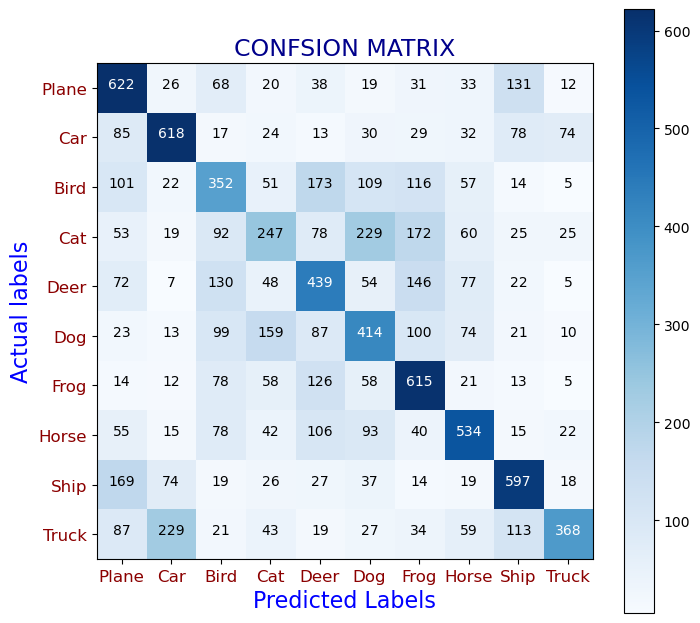

In [162]:
plt.figure(figsize=[8, 8], dpi=100)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('CONFSION MATRIX', fontsize=17, color='darkblue')
plt.xlabel('Predicted Labels', fontsize=16, color='blue')
plt.ylabel('Actual labels', fontsize=16, color='blue')

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, color='darkred', fontsize=12, labels=LABEL_NAMES)
plt.xticks(tick_marks, color='darkred', fontsize=12, labels=LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', 
             color=('white' if conf_matrix[i, j] > 300 else 'black'))

plt.show()

In [163]:
# TRUE POSITIVES
np.diag(conf_matrix)

array([622, 618, 352, 247, 439, 414, 615, 534, 597, 368], dtype=int64)

In [165]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.622, 0.618, 0.352, 0.247, 0.439, 0.414, 0.615, 0.534, 0.597,
       0.368])

In [167]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.486, 0.597, 0.369, 0.344, 0.397, 0.387, 0.474, 0.553, 0.58 ,
       0.676])

In [173]:
avg_recall = np.mean(recall)
print(f'Model 2 Recall score is:{avg_recall: .2%}')

Model 2 Recall score is: 48.06%


In [174]:
avg_precision = np.mean(precision)
print(f'Model 2 Precision score is:{avg_precision: .2%}')

Model 2 Precision score is: 48.63%


In [181]:
f_score = (2 * avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'F-Score of the Model 2 is:{f_score: .2%}')

F-Score of the Model 2 is: 48.34%
